In [1]:
# 

First, we'll import the libraries we're most likely to need.

In [2]:
import pandas as pd
import numpy as np
import sqlite3
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from scipy import stats

Next, we'll start investigating our data. We'll start with the imdb SQL database. 
To do this, we'll first make a connection, and then do some queries to pull in the info from the database tables.

In [3]:
path = "Data/im.db"
conn = sqlite3.connect(path)

## Connecting to SQL database for the IMDB website and querying to extract data 

#### IMDB 'known_for' table

In [4]:
# Extracting all the data from the 'known_for' table, plus the movies matching the movie_id and the person matching the person_id
dfknown_for = pd.read_sql("""
SELECT k.person_id, k.movie_id, p.primary_name, p.birth_year, p.death_year, p.primary_profession, m.primary_title
FROM known_for as k
JOIN movie_basics as m
ON k.movie_id = m.movie_id
JOIN persons as p
ON k.person_id = p.person_id;
""", conn)
dfknown_for

,person_id,movie_id,primary_name,birth_year,death_year,primary_profession,primary_title
0,nm0061671,tt0837562,Mary Ellen Bauder,NaN,NaN,"miscellaneous,production_manager,producer",Hotel Transylvania
1,nm0061671,tt2398241,Mary Ellen Bauder,NaN,NaN,"miscellaneous,production_manager,producer",Smurfs: The Lost Village
2,nm0061865,tt6791238,Joseph Bauer,NaN,NaN,"composer,music_department,sound_department",Totem
3,nm0061865,tt1682940,Joseph Bauer,NaN,NaN,"composer,music_department,sound_department",Playback
4,nm0062195,tt2004304,Axel Baumann,NaN,NaN,"camera_department,cinematographer,art_department",Mission Blue
...,...,...,...,...,...,...,...
791001,nm9990296,tt8319420,Fleurette Dicaire,NaN,NaN,None,"Le 186, pour la mémoire"
791002,nm9990690,tt8737130,Joo Yeon So,NaN,NaN,actress,Sodak Sodak
791003,nm9991320,tt8734436,Madeline Smith,NaN,NaN,actress,Comfortless
791004,nm9991320,tt9615610,Madeline Smith,NaN,NaN,actress,To Bloom at Night


#### IMDB 'directors' table

In [5]:
# Extracting all the data from the 'persons' table, joining it with all the data from the'directors' table, plus the movies matching the movie_id
dfdirectors = pd.read_sql("""
SELECT d.person_id, d.movie_id, p.primary_name, p.birth_year, p.death_year, p.primary_profession, m.primary_title
FROM directors as d
JOIN movie_basics as m
ON d.movie_id = m.movie_id
JOIN persons as p
ON d.person_id = p.person_id;
""", conn)
dfdirectors

,person_id,movie_id,primary_name,birth_year,death_year,primary_profession,primary_title
0,nm0899854,tt0285252,Tony Vitale,1964.0,NaN,"producer,director,writer",Life's a Beach
1,nm1940585,tt0462036,Bill Haley,NaN,NaN,"director,writer,producer",Steve Phoenix: The Untold Story
2,nm0151540,tt0835418,Jay Chandrasekhar,1968.0,NaN,"director,actor,writer",The Babymakers
3,nm0151540,tt0835418,Jay Chandrasekhar,1968.0,NaN,"director,actor,writer",The Babymakers
4,nm0089502,tt0878654,Albert Pyun,1954.0,NaN,"director,writer,producer",Bulletface
...,...,...,...,...,...,...,...
291166,nm10122357,tt8999974,Daysi Burbano,NaN,NaN,"director,writer,cinematographer",Madre Luna
291167,nm6711477,tt9001390,Bernard Lessa,NaN,NaN,"director,writer,cinematographer",The woman and the river
291168,nm10123242,tt9001494,Tate Nova,NaN,NaN,"director,producer",Stone Mountain Georgia 08.28.18
291169,nm10123248,tt9001494,Courtney Faye Powell,NaN,NaN,"director,producer",Stone Mountain Georgia 08.28.18


#### IMDB 'writers' table

In [6]:
# Extracting all the data from the 'persons' table, joining it with all the data from the 'writers' table, plus the movies matching the movie_id
dfwriters = pd.read_sql("""
SELECT w.person_id, w.movie_id, p.primary_name, p.birth_year, p.death_year, p.primary_profession, m.primary_title
FROM writers as w
JOIN movie_basics as m
ON w.movie_id = m.movie_id
JOIN persons as p
ON w.person_id = p.person_id;
""", conn)
dfwriters

,person_id,movie_id,primary_name,birth_year,death_year,primary_profession,primary_title
0,nm0899854,tt0285252,Tony Vitale,1964.0,NaN,"producer,director,writer",Life's a Beach
1,nm0175726,tt0438973,Steve Conrad,1968.0,NaN,"writer,producer,director",Sealand
2,nm1802864,tt0438973,Sean Sorensen,NaN,NaN,"producer,writer",Sealand
3,nm1940585,tt0462036,Bill Haley,NaN,NaN,"director,writer,producer",Steve Phoenix: The Untold Story
4,nm0310087,tt0835418,Peter Gaulke,NaN,NaN,"writer,actor,director",The Babymakers
...,...,...,...,...,...,...,...
255866,nm10122246,tt8999892,Bradley T. Castle,NaN,NaN,"actor,writer,producer",Dumpster Fire: A Time Of Current Times
255867,nm10122357,tt8999974,Daysi Burbano,NaN,NaN,"director,writer,cinematographer",Madre Luna
255868,nm6711477,tt9001390,Bernard Lessa,NaN,NaN,"director,writer,cinematographer",The woman and the river
255869,nm4993825,tt9004986,Fredrik Horn Akselsen,NaN,NaN,"director,writer,assistant_director",Syndebukken: Prosessen mot Harry Lindstrøm


#### IMDB 'principals' table

In [7]:
# Extracting all the data from the 'principals' table, plus the movies matching the movie_id and the person matching the person_id
dfprincipals = pd.read_sql("""
SELECT pl.movie_id, pl.person_id, pl.ordering, pl.category, pl.job, pl.characters, p.primary_name, m.primary_title
FROM principals as pl
JOIN movie_basics as m
ON pl.movie_id = m.movie_id
JOIN persons as p
ON pl.person_id = p.person_id;
""", conn)
dfprincipals

,movie_id,person_id,ordering,category,job,characters,primary_name,primary_title
0,tt0111414,nm0246005,1,actor,None,"[""The Man""]",Tommy Dysart,A Thin Life
1,tt0111414,nm0398271,2,director,None,None,Frank Howson,A Thin Life
2,tt0111414,nm3739909,3,producer,producer,None,Barry Porter-Robinson,A Thin Life
3,tt0323808,nm0059247,10,editor,None,None,Sean Barton,The Wicker Tree
4,tt0323808,nm3579312,1,actress,None,"[""Beth Boothby""]",Brittania Nicol,The Wicker Tree
...,...,...,...,...,...,...,...,...
1027907,tt9692684,nm0186469,1,actor,None,"[""Ebenezer Scrooge""]",Kenneth Cranham,Disnatured
1027908,tt9692684,nm4929530,2,self,None,"[""Herself"",""Regan""]",Pearl Mackie,Disnatured
1027909,tt9692684,nm10441594,3,director,None,None,Guy Jones,Disnatured
1027910,tt9692684,nm6009913,4,writer,writer,None,Sabrina Mahfouz,Disnatured


#### IMDB 'movie_basics' and 'movie_reviews' tables

In [8]:
# Extracting all the data from the 'movie_basics' table and joining it with the 'movie_ratings' table
df_basics = pd.read_sql("""
SELECT *
FROM movie_basics
JOIN movie_ratings
ON movie_basics.movie_id = movie_ratings.movie_id;
""", conn)
df_basics

,movie_id,primary_title,original_title,start_year,runtime_minutes,genres,movie_id,averagerating,numvotes
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama",tt0063540,7.0,77
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama",tt0066787,7.2,43
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama,tt0069049,6.9,4517
3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,NaN,"Comedy,Drama",tt0069204,6.1,13
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy",tt0100275,6.5,119
...,...,...,...,...,...,...,...,...,...
73851,tt9913084,Diabolik sono io,Diabolik sono io,2019,75.0,Documentary,tt9913084,6.2,6
73852,tt9914286,Sokagin Çocuklari,Sokagin Çocuklari,2019,98.0,"Drama,Family",tt9914286,8.7,136
73853,tt9914642,Albatross,Albatross,2017,NaN,Documentary,tt9914642,8.5,8
73854,tt9914942,La vida sense la Sara Amat,La vida sense la Sara Amat,2019,NaN,None,tt9914942,6.6,5


In [9]:
df_basics.head()

,movie_id,primary_title,original_title,start_year,runtime_minutes,genres,movie_id,averagerating,numvotes
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama",tt0063540,7.0,77
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama",tt0066787,7.2,43
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama,tt0069049,6.9,4517
3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,NaN,"Comedy,Drama",tt0069204,6.1,13
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy",tt0100275,6.5,119


#### IMDB 'movie_akas' table

In [10]:
# Extracting all the data from the 'principals' table, plus the movies matching the movie_id
df_akas = pd.read_sql("""
SELECT ma.movie_id, ma.ordering, ma.title, ma.region, ma.language, ma.types, ma.attributes, ma.is_original_title, m.primary_title
FROM movie_akas as ma
JOIN movie_basics as m
ON ma.movie_id = m.movie_id
""", conn)
df_akas

,movie_id,ordering,title,region,language,types,attributes,is_original_title,primary_title
0,tt0369610,10,Джурасик свят,BG,bg,None,None,0.0,Jurassic World
1,tt0369610,11,Jurashikku warudo,JP,None,imdbDisplay,None,0.0,Jurassic World
2,tt0369610,12,Jurassic World: O Mundo dos Dinossauros,BR,None,imdbDisplay,None,0.0,Jurassic World
3,tt0369610,13,O Mundo dos Dinossauros,BR,None,None,short title,0.0,Jurassic World
4,tt0369610,14,Jurassic World,FR,None,imdbDisplay,None,0.0,Jurassic World
...,...,...,...,...,...,...,...,...,...
331698,tt9827784,2,Sayonara kuchibiru,None,None,original,None,1.0,Farewell Song
331699,tt9827784,3,Farewell Song,XWW,en,imdbDisplay,None,0.0,Farewell Song
331700,tt9880178,1,La atención,None,None,original,None,1.0,The Attention
331701,tt9880178,2,La atención,ES,None,None,None,0.0,The Attention


## Import and review grossing data from CSV, 'bom.movie_gross.csv'

In [12]:
#Reading in the csv and turning it into a pandas dataframe
df_gross = pd.read_csv('Data/bom.movie_gross.csv')
df_gross.head()

,title,studio,domestic_gross,foreign_gross,year
0,Toy Story 3,BV,415000000.0,652000000,2010
1,Alice in Wonderland (2010),BV,334200000.0,691300000,2010
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,664300000,2010
3,Inception,WB,292600000.0,535700000,2010
4,Shrek Forever After,P/DW,238700000.0,513900000,2010


In [13]:
df_gross.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3387 entries, 0 to 3386
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   title           3387 non-null   object 
 1   studio          3382 non-null   object 
 2   domestic_gross  3359 non-null   float64
 3   foreign_gross   2037 non-null   object 
 4   year            3387 non-null   int64  
dtypes: float64(1), int64(1), object(3)
memory usage: 132.4+ KB


In [14]:
# Looking at NaNs in the dataframe
df_gross.isna().sum()

title                0
studio               5
domestic_gross      28
foreign_gross     1350
year                 0
dtype: int64

In [15]:
# Calculating the percentage of foreign_gross missing values
(df_gross['foreign_gross'].isna().sum()) / len(df_gross['foreign_gross'])

0.3985828166519043

______________________________________________________________________________________________________________________
**We know that our client is interested in a worldwide market. Because ~40% of the 'foreign_gross' column is missing, this dataset may not be very helpful to us.**
______________________________________________________________________________________________________________________

## Import and Review Rotten Tomatoes Movie Info CSV as df_rtmovieinfo

In [16]:
# Importing the rotten tomatoes movie_info csv into a pandas dataframe
df_rtmovieinfo = pd.read_csv('Data/rt.movie_info.tsv', delimiter= '\t')
df_rtmovieinfo.head()

,id,synopsis,rating,genre,director,writer,theater_date,dvd_date,currency,box_office,runtime,studio
0,1,"This gritty, fast-paced, and innovative police...",R,Action and Adventure|Classics|Drama,William Friedkin,Ernest Tidyman,"Oct 9, 1971","Sep 25, 2001",NaN,NaN,104 minutes,NaN
1,3,"New York City, not-too-distant-future: Eric Pa...",R,Drama|Science Fiction and Fantasy,David Cronenberg,David Cronenberg|Don DeLillo,"Aug 17, 2012","Jan 1, 2013",$,"600,000",108 minutes,Entertainment One
2,5,Illeana Douglas delivers a superb performance ...,R,Drama|Musical and Performing Arts,Allison Anders,Allison Anders,"Sep 13, 1996","Apr 18, 2000",NaN,NaN,116 minutes,NaN
3,6,Michael Douglas runs afoul of a treacherous su...,R,Drama|Mystery and Suspense,Barry Levinson,Paul Attanasio|Michael Crichton,"Dec 9, 1994","Aug 27, 1997",NaN,NaN,128 minutes,NaN
4,7,NaN,NR,Drama|Romance,Rodney Bennett,Giles Cooper,NaN,NaN,NaN,NaN,200 minutes,NaN


In [17]:
#Checking to se how much box office information is missing
(df_rtmovieinfo['box_office'].isna().sum()) / (len(df_rtmovieinfo['box_office']))

0.782051282051282

______________________________________________________________________________________________________________________
**We know that our client is specifically looking at aspects that make movies profitable. This dataset has ~78% missing box_office data. It's also missing a column with a movie title that would allow us to merge it with other profit data. Because of that, it's unlikely that we'll use this CSV for our main statistical analysis. However, we'll take a look at the rotten tomatoes reviews CSV below to see if that will help us**
______________________________________________________________________________________________________________________

## Import  and check out Rotten Tomatoes Reviews CSV as df_rtreviews

In [19]:
# Importing the rotten tomatoes reviews CSV
df_rtreviews = pd.read_csv('Data/rt.reviews.tsv', delimiter= '\t',encoding='latin-1')
df_rtreviews.head()

,id,review,rating,fresh,critic,top_critic,publisher,date
0,3,A distinctly gallows take on contemporary fina...,3/5,fresh,PJ Nabarro,0,Patrick Nabarro,"November 10, 2018"
1,3,It's an allegory in search of a meaning that n...,NaN,rotten,Annalee Newitz,0,io9.com,"May 23, 2018"
2,3,... life lived in a bubble in financial dealin...,NaN,fresh,Sean Axmaker,0,Stream on Demand,"January 4, 2018"
3,3,Continuing along a line introduced in last yea...,NaN,fresh,Daniel Kasman,0,MUBI,"November 16, 2017"
4,3,... a perverse twist on neorealism...,NaN,fresh,NaN,0,Cinema Scope,"October 12, 2017"


In [20]:
# Checking for NaNs in 'rating' column
df_rtreviews['rating'].isna().sum()

13517

In [21]:
# Checking percentage of missingness in 'rating' column
(df_rtreviews['rating'].isna().sum()) / len(df_rtreviews['rating']) 

0.24832818930041153

In [22]:
# Checking for NaNs in the 'fresh' review column
df_rtreviews['fresh'].isna().sum()

0

In [23]:
df_rtreviews.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54432 entries, 0 to 54431
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   id          54432 non-null  int64 
 1   review      48869 non-null  object
 2   rating      40915 non-null  object
 3   fresh       54432 non-null  object
 4   critic      51710 non-null  object
 5   top_critic  54432 non-null  int64 
 6   publisher   54123 non-null  object
 7   date        54432 non-null  object
dtypes: int64(2), object(6)
memory usage: 3.3+ MB


______________________________________________________________________________________________________________________
**While this CSV does have a good amount of review and rating data, which we know are important to our client, it still does not provide additional box_office data or any movie title data. It's unlikely that we will use this dataframe for the bulk of our research and analysis**
______________________________________________________________________________________________________________________

## Import and clean data from the The Movie DataBase(TMDB) website

In [24]:
# Importing the CSV into a pandas dataframe
df_tmdb = pd.read_csv('Data/tmdb.movies.csv')
df_tmdb.head()

,Unnamed: 0,genre_ids,id,original_language,original_title,popularity,release_date,title,vote_average,vote_count
0,0,"[12, 14, 10751]",12444,en,Harry Potter and the Deathly Hallows: Part 1,33.533,2010-11-19,Harry Potter and the Deathly Hallows: Part 1,7.7,10788
1,1,"[14, 12, 16, 10751]",10191,en,How to Train Your Dragon,28.734,2010-03-26,How to Train Your Dragon,7.7,7610
2,2,"[12, 28, 878]",10138,en,Iron Man 2,28.515,2010-05-07,Iron Man 2,6.8,12368
3,3,"[16, 35, 10751]",862,en,Toy Story,28.005,1995-11-22,Toy Story,7.9,10174
4,4,"[28, 878, 12]",27205,en,Inception,27.920,2010-07-16,Inception,8.3,22186


In [25]:
df_tmdb.isna().sum()

Unnamed: 0           0
genre_ids            0
id                   0
original_language    0
original_title       0
popularity           0
release_date         0
title                0
vote_average         0
vote_count           0
dtype: int64

In [26]:
df_tmdb['genre_ids'].head()

0        [12, 14, 10751]
1    [14, 12, 16, 10751]
2          [12, 28, 878]
3        [16, 35, 10751]
4          [28, 878, 12]
Name: genre_ids, dtype: object

The 'genre_ids' column appears to be strings that look like lists containing numbers. After looking at the TMDB website, we found [this]( https://www.themoviedb.org/talk/5daf6eb0ae36680011d7e6ee) resource that tells us which genre belongs to which 'genre_id' number. We'll want to replace all the numbers with the appropriate genre instead.

In [27]:
#replaced all the genre id codes with the genre
df_tmdb['genre_ids'] = df_tmdb['genre_ids'].str.replace('28', 'Action')
df_tmdb['genre_ids'] = df_tmdb['genre_ids'].str.replace('12', 'Adventure')
df_tmdb['genre_ids'] = df_tmdb['genre_ids'].str.replace('16', 'Animation')
df_tmdb['genre_ids'] = df_tmdb['genre_ids'].str.replace('35', 'Comedy')
df_tmdb['genre_ids'] = df_tmdb['genre_ids'].str.replace('80', 'Crime')
df_tmdb['genre_ids'] = df_tmdb['genre_ids'].str.replace('99', 'Documentary')
df_tmdb['genre_ids'] = df_tmdb['genre_ids'].str.replace('18', 'Drama')
df_tmdb['genre_ids'] = df_tmdb['genre_ids'].str.replace('10751', 'Family')
df_tmdb['genre_ids'] = df_tmdb['genre_ids'].str.replace('14', 'Fantasy')
df_tmdb['genre_ids'] = df_tmdb['genre_ids'].str.replace('36', 'History')
df_tmdb['genre_ids'] = df_tmdb['genre_ids'].str.replace('27', 'Horror')
df_tmdb['genre_ids'] = df_tmdb['genre_ids'].str.replace('10402', 'Music')
df_tmdb['genre_ids'] = df_tmdb['genre_ids'].str.replace('9648', 'Mystery')
df_tmdb['genre_ids'] = df_tmdb['genre_ids'].str.replace('10749', 'Romance')
df_tmdb['genre_ids'] = df_tmdb['genre_ids'].str.replace('878', 'Science_Fiction')
df_tmdb['genre_ids'] = df_tmdb['genre_ids'].str.replace('10770', 'TV_Movie')
df_tmdb['genre_ids'] = df_tmdb['genre_ids'].str.replace('53', 'Thriller')
df_tmdb['genre_ids'] = df_tmdb['genre_ids'].str.replace('10752', 'War')
df_tmdb['genre_ids'] = df_tmdb['genre_ids'].str.replace('37', 'Western')

In [28]:
# Checking our work
df_tmdb['genre_ids'].sample(15)

13919                 [Documentary, Family]
23747    [Drama, Science_Fiction, Thriller]
12902                             [Romance]
23732            [Thriller, Horror, Action]
13976              [Action, Horror, Comedy]
11936     [Thriller, Crime, Drama, Romance]
2930                   [Documentary, Drama]
943                                [Horror]
21869                    [Horror, Thriller]
4786                                     []
14917                     [Drama, Thriller]
21903                      [Action, Family]
7945                                [Drama]
26086               [Horror, Drama, Comedy]
19834                               [Drama]
Name: genre_ids, dtype: object

In [29]:
# Renaming the 'genre_id' column to 'genres'
df_tmdb = df_tmdb.rename(columns = {'genre_ids':'genres'})

In [30]:
# Dropping all rows where the genre value is "0" and strings that look like empty lists "[]"
df_tmdb = df_tmdb[df_tmdb['genres'].apply(lambda x: len(x) > 0) & (df_tmdb['genres'] != 0) & (df_tmdb['genres'] != '[]')]

We want to look at data from 2000 onwards, per our client's request. We'll create a column for 'release_year' to assist with this.

In [31]:
# Making 'release_year' column
df_tmdb['release_year'] = [x.strip()[0:4] for x in df_tmdb['release_date']]

In [32]:
#Checking to see how many years this dataframe includes, since we're looking at 2000 on
df_tmdb['release_year'].sort_values()

14335    1930
21758    1933
3580     1936
11192    1946
14740    1949
         ... 
24276    2019
24265    2019
24570    2019
25429    2019
26057    2020
Name: release_year, Length: 24038, dtype: object

In [33]:
# Dropping all rows with 'release_year' less than 2000
df_tmdb['release_year'] = df_tmdb['release_year'].astype(int)
df_tmdb = df_tmdb.drop(df_tmdb[df_tmdb['release_year'] < 2000].index)

In [34]:
df_tmdb['release_year'].sort_values()

6610     2000
5783     2000
58       2000
2594     2000
5352     2000
         ... 
24548    2019
24683    2019
25178    2019
24764    2019
26057    2020
Name: release_year, Length: 23922, dtype: int64

***We'll want to standardize the movie titles in all the dataframes. To do this, we'll remove all special characters and make the titles all lowercase.***

As our final steps of cleaning, we will rename the 'popularity', 'vote_average', and 'vote_count' columns to distinguish them from similar columns in other dataframes containing reviews. Additionally, we'll convert the genres to lowercase and create a 'unique-id' column for future merging purposes.

In [35]:
#Cleaning all the titles by removing special characters and making them all lowercase
df_tmdb['title'] = df_tmdb['title'].str.replace('[^a-zA-Z0-9]', '')
df_tmdb['title'] = df_tmdb['title'].str.replace(':', '')
df_tmdb['title'] = df_tmdb['title'].str.replace(';', '')
df_tmdb['title'] = df_tmdb['title'].str.replace('.', '')
df_tmdb['title'] = df_tmdb['title'].str.replace('?', '')
df_tmdb['title'] = df_tmdb['title'].str.replace('!', '')
df_tmdb['title'] = df_tmdb['title'].str.replace('-', '')
df_tmdb['title'] = df_tmdb['title'].str.replace(',', '')
df_tmdb['title'] = df_tmdb['title'].str.replace("'", "")
df_tmdb['title'] = df_tmdb['title'].str.replace("\"","")
df_tmdb['title'] = df_tmdb['title'].str.replace("/"," ")
df_tmdb['title'] = df_tmdb['title'].str.replace("("," ")
df_tmdb['title'] = df_tmdb['title'].str.replace(")"," ")
df_tmdb['title'] = df_tmdb['title'].str.lower()

In [36]:
# Changing the column titles so the are easy to tell apart after merging
df_tmdb = df_tmdb.rename(columns = {'popularity':'tmdb_popularity', 'vote_average':'average_rating_tmdb', 'vote_count':'vote_count_tmdb'})

In [37]:
# standardizing format by changing to lowercase
df_tmdb['genres'] = df_tmdb['genres'].str.lower()

In [38]:
df_tmdb['unique_id'] = df_tmdb['title'] + df_tmdb['release_date']

In [43]:
df_tmdb

,Unnamed: 0,genres,id,original_language,original_title,tmdb_popularity,release_date,title,average_rating_tmdb,vote_count_tmdb,release_year,unique_id
0,0,"[adventure, fantasy, family]",12444,en,Harry Potter and the Deathly Hallows: Part 1,33.533,2010-11-19,harry potter and the deathly hallows part 1,7.7,10788,2010,harry potter and the deathly hallows part 1201...
1,1,"[fantasy, adventure, animation, family]",10191,en,How to Train Your Dragon,28.734,2010-03-26,how to train your dragon,7.7,7610,2010,how to train your dragon2010-03-26
2,2,"[adventure, action, science_fiction]",10138,en,Iron Man 2,28.515,2010-05-07,iron man 2,6.8,12368,2010,iron man 22010-05-07
4,4,"[action, science_fiction, adventure]",27205,en,Inception,27.920,2010-07-16,inception,8.3,22186,2010,inception2010-07-16
5,5,"[adventure, fantasy, family]",32657,en,Percy Jackson & the Olympians: The Lightning T...,26.691,2010-02-11,percy jackson & the olympians the lightning thief,6.1,4229,2010,percy jackson & the olympians the lightning th...
...,...,...,...,...,...,...,...,...,...,...,...,...
26512,26512,"[horror, drama]",488143,en,Laboratory Conditions,0.600,2018-10-13,laboratory conditions,0.0,1,2018,laboratory conditions2018-10-13
26513,26513,"[drama, thriller]",485975,en,_EXHIBIT_84xxx_,0.600,2018-05-01,_exhibit_84xxx_,0.0,1,2018,_exhibit_84xxx_2018-05-01
26514,26514,"[fantasy, action, adventure]",381231,en,The Last One,0.600,2018-10-01,the last one,0.0,1,2018,the last one2018-10-01
26515,26515,"[family, adventure, action]",366854,en,Trailer Made,0.600,2018-06-22,trailer made,0.0,1,2018,trailer made2018-06-22


## Import and clean Movie Budgets CSV as df_budget

First, we'll import the data into a pandas dataframe and take a look at what may need cleaning.

In [44]:
#Importing the CSV containing movie budget data
df_budget = pd.read_csv('Data/tn.movie_budgets.csv')
df_budget.head()

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,"Dec 18, 2009",Avatar,"$425,000,000","$760,507,625","$2,776,345,279"
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875"
2,3,"Jun 7, 2019",Dark Phoenix,"$350,000,000","$42,762,350","$149,762,350"
3,4,"May 1, 2015",Avengers: Age of Ultron,"$330,600,000","$459,005,868","$1,403,013,963"
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,"$317,000,000","$620,181,382","$1,316,721,747"


In [45]:
df_budget.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5782 entries, 0 to 5781
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   id                 5782 non-null   int64 
 1   release_date       5782 non-null   object
 2   movie              5782 non-null   object
 3   production_budget  5782 non-null   object
 4   domestic_gross     5782 non-null   object
 5   worldwide_gross    5782 non-null   object
dtypes: int64(1), object(5)
memory usage: 271.2+ KB


In [46]:
# Checking for NaNs in the dataframe
df_budget.isna().sum()

id                   0
release_date         0
movie                0
production_budget    0
domestic_gross       0
worldwide_gross      0
dtype: int64

**The 'worldwide_gross' column in this dataframe will be crucial for our analysis, as our client wants us to examine grossing information. Let's check for any hidden missing values here.**

In [47]:
df_budget['worldwide_gross'].value_counts()

worldwide_gross
$0             367
$8,000,000       9
$2,000,000       6
$7,000,000       6
$4,000,000       4
              ... 
$39,498,360      1
$94,875,000      1
$77,593,167      1
$36,299,670      1
$181,041         1
Name: count, Length: 5356, dtype: int64

We can already observe some missing values represented as "$0". We'll need to clean the 'worldwide_gross' values before dropping them. However, we'll tackle this step later on.

We then created a new column for 'release_year', renamed the 'movie' column to 'title' to align with the naming convention used in other dataframes, and standardized the values in the 'worldwide_gross', 'domestic_gross', and 'production_budget' columns.

In [48]:
#making a new column for release year
df_budget['release_year'] = [x.strip()[-4:] for x in df_budget['release_date']]
df_budget['release_year'] = pd.to_numeric(df_budget['release_year'], downcast="integer")

In [49]:
#Making this dataframe match the others by changing the column 'movie' to 'title'
df_budget = df_budget.rename(columns = {'movie':'title'})

In [50]:
#cleaning df_budget's domestic and worldwide gross columns so they can be changed to integers
df_budget['domestic_gross'] = df_budget['domestic_gross'].str.replace('$', '')
df_budget['domestic_gross'] = df_budget['domestic_gross'].str.replace(',', '')
df_budget['domestic_gross'] = df_budget['domestic_gross'].astype(int)

In [51]:
df_budget['worldwide_gross'] = df_budget['worldwide_gross'].astype(str)
df_budget['worldwide_gross'] = df_budget['worldwide_gross'].str.replace('$', '')
df_budget['worldwide_gross'] = df_budget['worldwide_gross'].str.replace(',', '')
df_budget['worldwide_gross'] = df_budget['worldwide_gross'].astype(int)

In [52]:
df_budget['production_budget'] = df_budget['production_budget'].str.replace('$', '')
df_budget['production_budget'] = df_budget['production_budget'].str.replace(',', '')
df_budget['production_budget'] = df_budget['production_budget'].astype(int)

In [53]:
# Dropping hidden NaN values in the worldwide_gross column
df_budget = df_budget[df_budget['worldwide_gross'] != 0]
df_budget = df_budget.dropna(subset=['worldwide_gross'])
df_budget = df_budget[df_budget['worldwide_gross'] != '']

In [54]:
# Checking our work
df_budget['worldwide_gross'].value_counts()

worldwide_gross
8000000     9
7000000     6
2000000     6
5000000     4
10000000    4
           ..
39498360    1
94875000    1
77593167    1
36299670    1
181041      1
Name: count, Length: 5355, dtype: int64

In [55]:
df_budget['title'].sample(15)

5220                        Hellraiser
5393                  Naturally Native
3335                  The Perfect Game
2783              Under the Tuscan Sun
3400    The Postman Always Rings Twice
1299               Across the Universe
4208                         Crossover
2875                    Halloween: H2O
757                        Money Train
3978                             Crash
1973                    The Last Stand
2005                   United Passions
3815               Flammen og Citronen
3964                Witless Protection
3238                     Der Untergang
Name: title, dtype: object

We'll ensure consistency in movie titles across all dataframes by removing special characters and converting them to lowercase.

In [62]:
# Removing all special characters and making the titles lowercase
df_budget['title'] = df_budget['title'].str.replace('[^a-zA-Z0-9]', '')
df_budget['title'] = df_budget['title'].str.replace(':', '')
df_budget['title'] = df_budget['title'].str.replace(';', '')
df_budget['title'] = df_budget['title'].str.replace('.', '')
df_budget['title'] = df_budget['title'].str.replace('?', '')
df_budget['title'] = df_budget['title'].str.replace('!', '')
df_budget['title'] = df_budget['title'].str.replace('-', '')
df_budget['title'] = df_budget['title'].str.replace(',', '')
df_budget['title'] = df_budget['title'].str.replace("'", "")
df_budget['title'] = df_budget['title'].str.replace("\"","")
df_budget['title'] = df_budget['title'].str.replace("/"," ")
df_budget['title'] = df_budget['title'].str.replace("("," ")
df_budget['title'] = df_budget['title'].str.replace(")"," ")
df_budget['title'] = df_budget['title'].str.lower()

In [63]:
#Checking our work
df_budget['title'].sample(15)

585                         the legend of zorro
673     the spongebob movie sponge out of water
3150                          the son of no one
889                                  the jackal
3005                         the imitation game
3657                                 heartbeeps
2400                                 spaceballs
506                               mirror mirror
4110                                    gomorra
111                                    47 ronin
5087                                killing zoe
3276            the perks of being a wallflower
3410                                    screwed
4141                              war and peace
2536                            meet the browns
Name: title, dtype: object

## Cleaning df_gross in order to merge

We'd like to utilize the foreign_gross column in this dataset, but unfortunately, there appears to be too much missing data. Since we may not use this dataframe extensively, we won't perform extensive cleaning. However, we will still standardize and clean the movie titles, as done in our previous datasets.

In [64]:
#Checking out the titles to see what cleaning will need to be done
df_gross['title'].sample(10)

2810               The Hitman's Bodyguard
2669                    Phantom Detective
1033                              Trishna
3373    Marlina the Murderer in Four Acts
147                                Buried
3327                  The Young Karl Marx
1025                           Compliance
1436                     The We and the I
2655            New York, New York (2016)
2122                             Red Army
Name: title, dtype: object

In [65]:
#Removing all special characters and making the title lowercase in order to standarize format
df_gross['title'] = df_gross['title'].str.replace('[^a-zA-Z0-9]', '')
df_gross['title'] = df_gross['title'].str.replace(':', '')
df_gross['title'] = df_gross['title'].str.replace(';', '')
df_gross['title'] = df_gross['title'].str.replace('.', '')
df_gross['title'] = df_gross['title'].str.replace('?', '')
df_gross['title'] = df_gross['title'].str.replace('!', '')
df_gross['title'] = df_gross['title'].str.replace('-', '')
df_gross['title'] = df_gross['title'].str.replace(',', '')
df_gross['title'] = df_gross['title'].str.replace("'", "")
df_gross['title'] = df_gross['title'].str.replace("\"","")
df_gross['title'] = df_gross['title'].str.replace("/"," ")
df_gross['title'] = df_gross['title'].str.replace("("," ")
df_gross['title'] = df_gross['title'].str.replace(")"," ")
df_gross['title'] = df_gross['title'].str.lower()

In [66]:
#Checking our work
df_gross['title'].sample(10)

2269     noma  my perfect storm
2087       clouds of sils maria
3109                 green book
2120    seymour an introduction
655                  the robber
1336             reality  2013 
1954              run all night
1493             the lego movie
59           life as we know it
2376               dont breathe
Name: title, dtype: object

## Cleaning df_basics

Next, we'll clean the movie data from IMDb in the dataframe 'df_basics'

This involves standardizing and cleaning column names, movie title formats, genre formats, and dropping appropriate NaNs.

Similar to the other dataframes we've cleaned, we'll also remove all rows with a 'release_date' before 2000.

In [58]:
# Changing column name to 'release_year' to match other dataframes
df_basics = df_basics.rename(columns = {'start_year': 'release_year'})

In [59]:
# Changing column name to match the other dataframes
df_basics = df_basics.rename(columns = {'primary_title':'title'})

In [60]:
#Cleaning and standardizing title format by removing special character and  making them all lower case
df_basics['title'] = df_basics['title'].str.replace('[^a-zA-Z0-9]', '')
df_basics['title'] = df_basics['title'].str.replace(':', '')
df_basics['title'] = df_basics['title'].str.replace(';', '')
df_basics['title'] = df_basics['title'].str.replace('.', '')
df_basics['title'] = df_basics['title'].str.replace('?', '')
df_basics['title'] = df_basics['title'].str.replace('!', '')
df_basics['title'] = df_basics['title'].str.replace('-', '')
df_basics['title'] = df_basics['title'].str.replace(',', '')
df_basics['title'] = df_basics['title'].str.replace("'", "")
df_basics['title'] = df_basics['title'].str.replace("\"","")
df_basics['title'] = df_basics['title'].str.replace("/"," ")
df_basics['title'] = df_basics['title'].str.replace("("," ")
df_basics['title'] = df_basics['title'].str.replace(")"," ")
df_basics['title'] = df_basics['title'].str.lower()

In [61]:
#Making genres lowercase
df_basics['genres'] = df_basics['genres'].str.lower()

In [67]:
df_basics.head()

,movie_id,title,original_title,release_year,runtime_minutes,genres,movie_id,averagerating,numvotes
0,tt0063540,sunghursh,Sunghursh,2013,175.0,"action,crime,drama",tt0063540,7.0,77
1,tt0066787,one day before the rainy season,Ashad Ka Ek Din,2019,114.0,"biography,drama",tt0066787,7.2,43
2,tt0069049,the other side of the wind,The Other Side of the Wind,2018,122.0,drama,tt0069049,6.9,4517
3,tt0069204,sabse bada sukh,Sabse Bada Sukh,2018,NaN,"comedy,drama",tt0069204,6.1,13
4,tt0100275,the wandering soap opera,La Telenovela Errante,2017,80.0,"comedy,drama,fantasy",tt0100275,6.5,119


In [68]:
# We want todo statistical analysis on the different 'genres.' Therefore, well drop rows that have NaNs in that column.
df_basics = df_basics.dropna(subset=['genres'])

In [69]:
# Cleaning up other NaNs
df_basics = df_basics.drop(df_basics[(df_basics['runtime_minutes'].isna()) | 
                                      (df_basics['runtime_minutes'] == '0') |
                                      (df_basics['runtime_minutes'] == '[]')].index)

In [70]:
# Removing any hidden NaNs in 'genres'
df_basics = df_basics.drop(df_basics[((df_basics['genres'] == '0') |
                                      (df_basics['genres'] == '[]'))].index)

In [71]:
#Splitting the genres and turning them into list items
df_basics['genres'] = df_basics['genres'].str.split(',')

In [72]:
df_basics.info()

<class 'pandas.core.frame.DataFrame'>
Index: 65720 entries, 0 to 73855
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   movie_id         65720 non-null  object 
 1   title            65720 non-null  object 
 2   original_title   65720 non-null  object 
 3   release_year     65720 non-null  int64  
 4   runtime_minutes  65720 non-null  float64
 5   genres           65720 non-null  object 
 6   movie_id         65720 non-null  object 
 7   averagerating    65720 non-null  float64
 8   numvotes         65720 non-null  int64  
dtypes: float64(2), int64(2), object(5)
memory usage: 5.0+ MB


In [73]:
#changing column names so that if merged, it's easy to tell the source of the ratings and vote counts
df_basics = df_basics.rename(columns = {'averagerating':'average_rating_imdb', 'numvotes':'vote_count_imdb'})

In [74]:
# Similar to the other dataframes we've cleaned, we'll also remove all rows with a 'release_date' before 2000.
df_basics = df_basics[df_basics['release_year'] >= 2000]

In [75]:
df_basics.shape

(65720, 9)

In [76]:
# Checking our work
df_basics['release_year'].value_counts()

release_year
2016    7785
2017    7718
2015    7650
2014    7528
2013    7216
2012    6866
2018    6573
2011    6542
2010    6038
2019    1804
Name: count, dtype: int64

In [77]:
# Checking our work
df_budget.head()

,id,release_date,title,production_budget,domestic_gross,worldwide_gross,release_year
0,1,"Dec 18, 2009",avatar,425000000,760507625,2776345279,2009
1,2,"May 20, 2011",pirates of the caribbean on stranger tides,410600000,241063875,1045663875,2011
2,3,"Jun 7, 2019",dark phoenix,350000000,42762350,149762350,2019
3,4,"May 1, 2015",avengers age of ultron,330600000,459005868,1403013963,2015
4,5,"Dec 15, 2017",star wars ep viii the last jedi,317000000,620181382,1316721747,2017


## Merging df_budget and df_tmdb

The initial dataframes we'll merge for comparison are df_budget and df_tmdb. Subsequently, we'll conduct statistical analysis to determine the most profitable genres and other factors influencing profitability. Before merging, there are a few final cleaning steps to take as well.

In [78]:
df_tmdb.head(3)

,Unnamed: 0,genres,id,original_language,original_title,tmdb_popularity,release_date,title,average_rating_tmdb,vote_count_tmdb,release_year,unique_id
0,0,"[adventure, fantasy, family]",12444,en,Harry Potter and the Deathly Hallows: Part 1,33.533,2010-11-19,harry potter and the deathly hallows part 1,7.7,10788,2010,harry potter and the deathly hallows part 1201...
1,1,"[fantasy, adventure, animation, family]",10191,en,How to Train Your Dragon,28.734,2010-03-26,how to train your dragon,7.7,7610,2010,how to train your dragon2010-03-26
2,2,"[adventure, action, science_fiction]",10138,en,Iron Man 2,28.515,2010-05-07,iron man 2,6.8,12368,2010,iron man 22010-05-07


In [79]:
# Removing some irrelevant columns
df_tmdb = df_tmdb.drop(['original_title', 'id'], axis='columns')

In [82]:
# Giving df_tmdb a unique identifier that we can use to merge
df_tmdb['unique_movie'] = df_tmdb['title'] + df_tmdb['release_date'].astype(str)
df_tmdb['unique_movie'] = df_tmdb['unique_movie'].apply(lambda x: ''.join([c.lower() for c in x if c.isalnum()]))
df_tmdb.drop_duplicates(inplace=True,subset='unique_movie')

In [83]:
df_budget['release_date'].sample(5)

3128    Sep 15, 2010
4653     Jul 6, 2018
5202     Mar 7, 2017
3421    Feb 13, 2009
168     Jul 21, 2017
Name: release_date, dtype: object

In [84]:
# Changing the 'release_date' string to datetime objects 
df_budget['release_date'] = pd.to_datetime(df_budget['release_date'],format='%b %d, %Y')
df_budget.release_date = df_budget.release_date.dt.strftime('%Y-%m-%d')

In [85]:
# Giving df_budget a unique identifier that we can use to merge to dataframes
df_budget['unique_movie'] = df_budget['title'] + df_budget['release_date'].astype(str)
df_budget['unique_movie'] = df_budget['unique_movie'].apply(lambda x: ''.join([c.lower() for c in x if c.isalnum()]))
df_budget.drop_duplicates(inplace=True,subset='unique_movie')

In [86]:
# Merging the dataframes
df_budget1 = pd.merge(df_budget, df_tmdb, on= 'unique_movie')

In [88]:
df_budget1.head()

,id,release_date_x,title_x,production_budget,domestic_gross,worldwide_gross,release_year_x,unique_movie,Unnamed: 0,genres,original_language,tmdb_popularity,release_date_y,title_y,average_rating_tmdb,vote_count_tmdb,release_year_y,unique_id
0,1,2009-12-18,avatar,425000000,760507625,2776345279,2009,avatar20091218,6,"[action, adventure, fantasy, science_fiction]",en,26.526,2009-12-18,avatar,7.4,18676,2009,avatar2009-12-18
1,2,2011-05-20,pirates of the caribbean on stranger tides,410600000,241063875,1045663875,2011,piratesofthecaribbeanonstrangertides20110520,2470,"[adventure, action, fantasy]",en,30.579,2011-05-20,pirates of the caribbean on stranger tides,6.4,8571,2011,pirates of the caribbean on stranger tides2011...
2,4,2015-05-01,avengers age of ultron,330600000,459005868,1403013963,2015,avengersageofultron20150501,14169,"[action, adventure, science_fiction]",en,44.383,2015-05-01,avengers age of ultron,7.3,13457,2015,avengers age of ultron2015-05-01
3,7,2018-04-27,avengers infinity war,300000000,678815482,2048134200,2018,avengersinfinitywar20180427,23811,"[adventure, action, fantasy]",en,80.773,2018-04-27,avengers infinity war,8.3,13948,2018,avengers infinity war2018-04-27
4,9,2017-11-17,justice league,300000000,229024295,655945209,2017,justiceleague20171117,20623,"[action, adventure, fantasy, science_fiction]",en,34.953,2017-11-17,justice league,6.2,7510,2017,justice league2017-11-17


In [89]:
# A little more cleaning to make things easier to analyze 
df_budget1 = df_budget1.drop(['title_y', 'release_date_y', 'id'], axis='columns')

In [91]:
df_budget1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1252 entries, 0 to 1251
Data columns (total 15 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   release_date_x       1252 non-null   object 
 1   title_x              1252 non-null   object 
 2   production_budget    1252 non-null   int64  
 3   domestic_gross       1252 non-null   int64  
 4   worldwide_gross      1252 non-null   int64  
 5   release_year_x       1252 non-null   int16  
 6   unique_movie         1252 non-null   object 
 7   Unnamed: 0           1252 non-null   int64  
 8   genres               1252 non-null   object 
 9   original_language    1252 non-null   object 
 10  tmdb_popularity      1252 non-null   float64
 11  average_rating_tmdb  1252 non-null   float64
 12  vote_count_tmdb      1252 non-null   int64  
 13  release_year_y       1252 non-null   int64  
 14  unique_id            1252 non-null   object 
dtypes: float64(2), int16(1), int64(6), obj

## Analysis of Variables Correlating with Worldwide Gross and Gross Success Across Different Genres

Ultimately, we aim to analyze trends in 'worldwide_gross' by genre. However, let's explore other factors that may influence gross first. We'll examine TMDB's 'popularity' metric and its correlation with gross, along with exploring whether 'production_budget' and 'average_rating' correlate with gross.

For a reference of what goes into the metric, 'popularity', please see [this website](https://developer.themoviedb.org/docs/popularity-and-trending)

In [92]:
#Assigning a primary genre to every movie so that we can analyize the different genres
df_budget1['genres'] = df_budget1['genres'].str.strip('[]').str.split(', ')
df_budget1['primary_genre'] = df_budget1['genres'].apply(lambda x: x[0] if len(x) > 0 else None)

df_budget1.head()

,release_date_x,title_x,production_budget,domestic_gross,worldwide_gross,release_year_x,unique_movie,Unnamed: 0,genres,original_language,tmdb_popularity,average_rating_tmdb,vote_count_tmdb,release_year_y,unique_id,primary_genre
0,2009-12-18,avatar,425000000,760507625,2776345279,2009,avatar20091218,6,"[action, adventure, fantasy, science_fiction]",en,26.526,7.4,18676,2009,avatar2009-12-18,action
1,2011-05-20,pirates of the caribbean on stranger tides,410600000,241063875,1045663875,2011,piratesofthecaribbeanonstrangertides20110520,2470,"[adventure, action, fantasy]",en,30.579,6.4,8571,2011,pirates of the caribbean on stranger tides2011...,adventure
2,2015-05-01,avengers age of ultron,330600000,459005868,1403013963,2015,avengersageofultron20150501,14169,"[action, adventure, science_fiction]",en,44.383,7.3,13457,2015,avengers age of ultron2015-05-01,action
3,2018-04-27,avengers infinity war,300000000,678815482,2048134200,2018,avengersinfinitywar20180427,23811,"[adventure, action, fantasy]",en,80.773,8.3,13948,2018,avengers infinity war2018-04-27,adventure
4,2017-11-17,justice league,300000000,229024295,655945209,2017,justiceleague20171117,20623,"[action, adventure, fantasy, science_fiction]",en,34.953,6.2,7510,2017,justice league2017-11-17,action


### The first correlation we'll test is 'worldwide_gross' and popularity.

Null Hypothesis: There is no correlation between 'worldwide_gross and 'tmdb_popularity'.

Alternative Hypothesis: There is a correlation between 'worldwide_gross and 'tmdb_popularity'.

In [93]:
# Running the correlation test
correlation, p_value = stats.pearsonr(df_budget1['worldwide_gross'], df_budget1['tmdb_popularity'])

print("Correlation coefficient:", correlation)
print("P-value:", p_value)
#Since the correlation coefficient is ~ 0.64, there is a moderate positive correlation between worldwide gross and popularity

Correlation coefficient: 0.638617378676187
P-value: 2.116742046249883e-144


Since the p-value is much smaller than our assumed alpha of 0.05, we reject the null hypothesis. With a correlation coefficient of approximately 0.64, we can conclude that there exists a moderate positive correlation between worldwide gross and popularity.

We'll plot the line-of-best-fit to represent this correlation below.

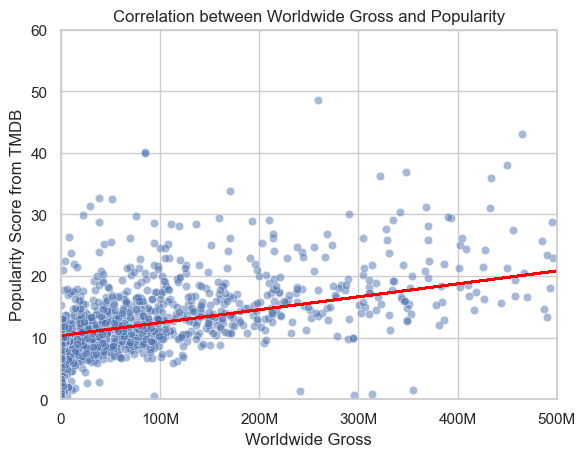

In [94]:
sns.set(style="whitegrid")

# Data to plot
x = df_budget1['worldwide_gross']
y = df_budget1['tmdb_popularity']

# Plot the scatter plot
sns.scatterplot(x=x, y=y, alpha=0.5)

# Add a line of best fit
m, b = np.polyfit(x, y, 1)
plt.plot(x, m*x + b, color='red')

# Label the axes and title the plot
plt.xlabel('Worldwide Gross')
plt.ylabel('Popularity Score from TMDB')
plt.title('Correlation between Worldwide Gross and Popularity')

plt.xlim(0, 500000000) # Adjust the values as needed
plt.ylim(0, 60) # Adjust the values as needed

plt.xticks([0, 100000000, 200000000, 300000000, 400000000, 500000000], ['0', '100M', '200M', '300M', '400M', '500M'])

# Show the plot
plt.show()

### The next correlation we'll test is 'worldwide_gross' and average rating.

Null Hypothesis: There is no correlation between 'worldwide_gross and 'average_rating_tmdb'.

Alternative Hypothesis: There is a correlation between 'worldwide_gross and 'average_rating_tmdb'.

In [95]:
# Running the Pearson correlation test
correlation, p_value = stats.pearsonr(df_budget1['worldwide_gross'], df_budget1['average_rating_tmdb'])

print("Correlation coefficient:", correlation)
print("P-value:", p_value)
#Since the correlation coefficient is ~0.28, We know there is a negligible positive correlation between average tmdb rating and worldwide gross

Correlation coefficient: 0.2797471605863079
P-value: 6.072390493703804e-24


The p-value is smaller than our assumed alpha of 0.05, indicating rejection of the null hypothesis. However, with a correlation coefficient of only approximately 0.28, we observe only a negligible positive correlation between average TMDB rating and worldwide gross.

Nevertheless, to visualize and compare, we'll plot the line of best fit for this correlation below.

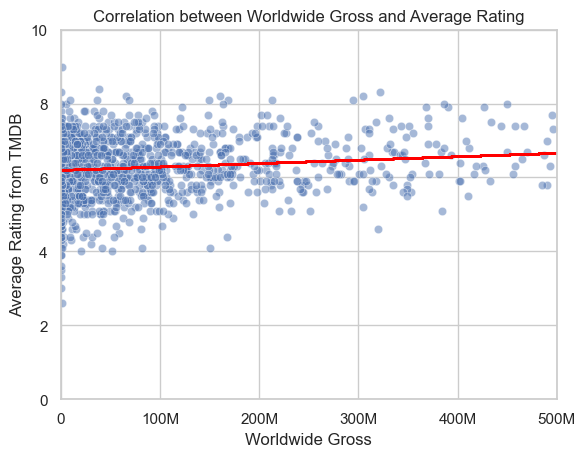

In [96]:
# Set the style
sns.set(style="whitegrid")

# Data
x = df_budget1['worldwide_gross']
y = df_budget1['average_rating_tmdb']

# Plot the scatter plot
sns.scatterplot(x=x, y=y, alpha=0.5)

# Add a line of best fit
m, b = np.polyfit(x, y, 1)
plt.plot(x, m*x + b, color='red')

# Label the axes and title the plot
plt.xlabel('Worldwide Gross')
plt.ylabel('Average Rating from TMDB')
plt.title('Correlation between Worldwide Gross and Average Rating')

plt.xlim(0, 500000000) # Adjust the values as needed
plt.ylim(0, 10) # Adjust the values as needed

plt.xticks([0, 100000000, 200000000, 300000000, 400000000, 500000000], ['0', '100M', '200M', '300M', '400M', '500M'])

# Show the plot
plt.show()

### Finally, we'll test to see if there's a correlation between 'worldwide_gross' and 'production_budget'

Null Hypothesis: There is no correlation between 'worldwide_gross and 'production_budget'. 

Alternative Hypothesis: There is a correlation between 'worldwide_gross and 'production_budget'.

In [97]:
correlation, p_value = stats.pearsonr(df_budget1['worldwide_gross'], df_budget1['production_budget'])

print("Correlation coefficient:", correlation)
print("P-value:", p_value)
#Since the correlation coefficient is ~ 0.80, we know there is a high positive correlation between production budget and worldwide gross

Correlation coefficient: 0.7971447038675135
P-value: 3.610239842077449e-276


The p-value is smaller than our assumed alpha of 0.05, so we reject the null hypothesis. Since the correlation coefficient is ~ 0.80, we know there is a high positive correlation between production budget and worldwide gross.

We'll plot a best-line-of-fit below to demonstrate the strong correlation.

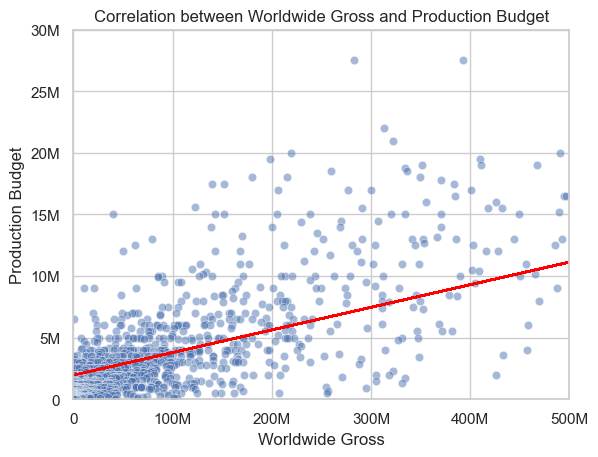

In [98]:
sns.set(style="whitegrid")

# Data
x = df_budget1['worldwide_gross']
y = df_budget1['production_budget']

# Plot the scatter plot
sns.scatterplot(x=x, y=y, alpha=0.5)

# Add a line of best fit
m, b = np.polyfit(x, y, 1)
plt.plot(x, m*x + b, color='red')

# Label the axes and title the plot
plt.xlabel('Worldwide Gross')
plt.ylabel('Production Budget')
plt.title('Correlation between Worldwide Gross and Production Budget')

plt.xlim(0, 500000000) # Adjust the values as needed
plt.ylim(0, 300000000) # Adjust the values as needed

plt.xticks([0, 100000000, 200000000, 300000000, 400000000, 500000000], ['0', '100M', '200M', '300M', '400M', '500M'])
plt.yticks([0, (100000000/2), 100000000, (100000000 * 1.5), 200000000, (100000000 * 2.5), 300000000], ['0', '5M', '10M', '15M', '20M', '25M', '30M'])

# Show the plot
plt.show()

### ANOVA test to compare the mean 'worldwide_gross' among different genres.


We'll conduct a preliminary ANOVA test to assess differences in the means of worldwide gross across genres. However, it's important to note that due to varying sample sizes for each genre, this test may not be perfectly suited. If we had a method to weight the values for the ANOVA test, it would enhance accuracy. Nonetheless, the ANOVA test will provide an initial indication of whether the gross varies significantly among genres. Before performing the test, we'll filter out genres with a sample size less than 20 to prevent too much skew in the data.

In [99]:
# Checking for variation in sample sizes
df_budget1['primary_genre'].value_counts()

primary_genre
drama              304
action             237
comedy             233
horror              81
adventure           80
thriller            65
crime               60
animation           35
science_fiction     32
romance             30
fantasy             26
family              20
mystery             15
documentary         12
war                 10
history              5
music                5
western              2
Name: count, dtype: int64

#### ANOVA TEST

Null hypothesis: There is no difference in the 'worldwide_gross' across different genres.

Alternative hypothesis: There is a statistical significance between 'worldwide_gross' across different genres.

In [100]:
# Filter out genres with small sample sizes. 
genre_counts = df_budget1['primary_genre'].value_counts()
valid_genres = genre_counts[genre_counts >= 20].index
df_filtered = df_budget1[df_budget1['primary_genre'].isin(valid_genres)]

# Group by 'primary_genre' and 'worldwide_gross'
genre_groups = df_filtered.groupby('primary_genre')['worldwide_gross']
genre_data = [group[1] for group in genre_groups]

# Perform the ANOVA test
f_statistic, p_value = stats.f_oneway(*genre_data)

print("F-statistic:", f_statistic)
print("P-value:", p_value)

F-statistic: 28.29113035985715
P-value: 4.751386407083037e-53



**Since the p-value is extremely small (close to zero), we can reject the null hypothesis and conclude that there is likely a significant difference in the worldwide gross between different genres of movies. The F-statistic of ~27.67 likely suggests that there is some statistical significance among different genres' worldwide gross. However, as we mentioned earlier, an ANOVA test isn't perfect for this scenario. We'll double-check our results by comparing the central tendencies of worldwide gross by genre below.**


In [101]:
# Calculating mean 'worldwide_gross'
genre_stats = df_budget1.groupby('primary_genre')['worldwide_gross'].mean().reset_index()
genre_stats.rename(columns={'worldwide_gross': 'mean'}, inplace=True)

# Calculate median 'worldwide_gross'
genre_stats['median'] = df_budget1.groupby('primary_genre')['worldwide_gross'].median().values

#### Below we'll plot the central tendencies of the genres, central tendencies of only the genres including in the ANOVA test, mean of the genres, the count of each genre, and the average popularity of each genre. 

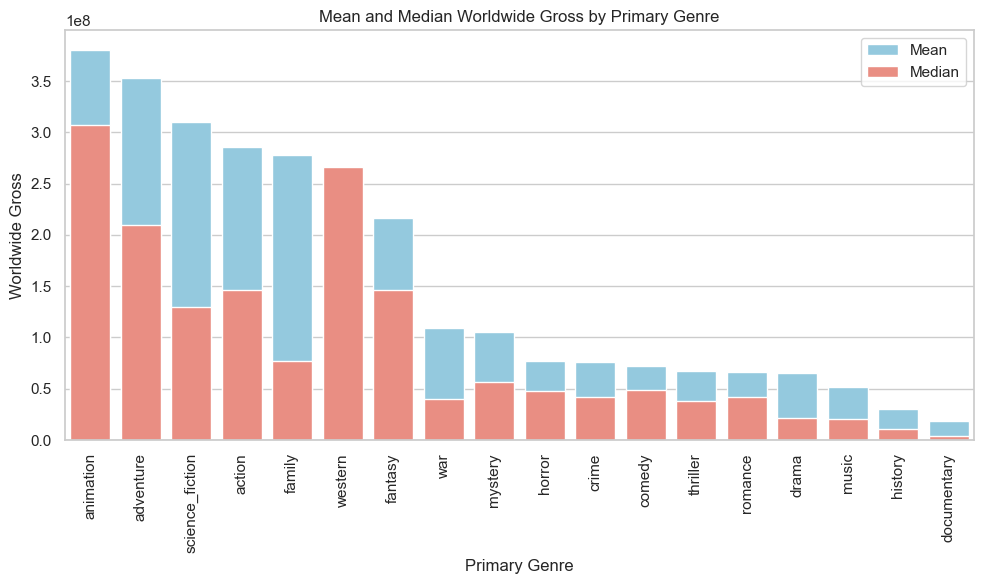

In [102]:
# Plotting the central tendencies for comparison
genre_stats.reset_index(inplace=True)

# Plot
sorted_genre_stats = genre_stats.sort_values(by='mean', ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(x='primary_genre', y='mean', data=sorted_genre_stats, color='skyblue', label='Mean')
sns.barplot(x='primary_genre', y='median', data=sorted_genre_stats, color='salmon', label='Median')
plt.xlabel('Primary Genre')
plt.ylabel('Worldwide Gross')
plt.title('Mean and Median Worldwide Gross by Primary Genre')
plt.xticks(rotation=90)
plt.legend()
plt.tight_layout()
plt.show()

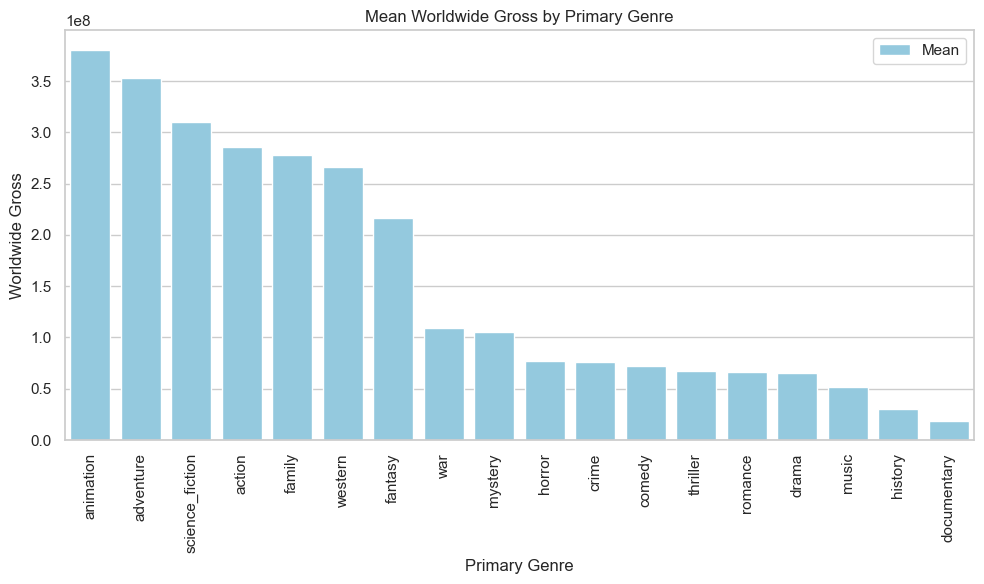

In [103]:
sorted_genre_stats3 = genre_stats.sort_values(by='mean', ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(x='primary_genre', y='mean', data=sorted_genre_stats3, color='skyblue', label='Mean')
plt.xlabel('Primary Genre')
plt.ylabel('Worldwide Gross')
plt.title('Mean Worldwide Gross by Primary Genre')
plt.xticks(rotation=90)
plt.legend()
plt.tight_layout()
plt.show()

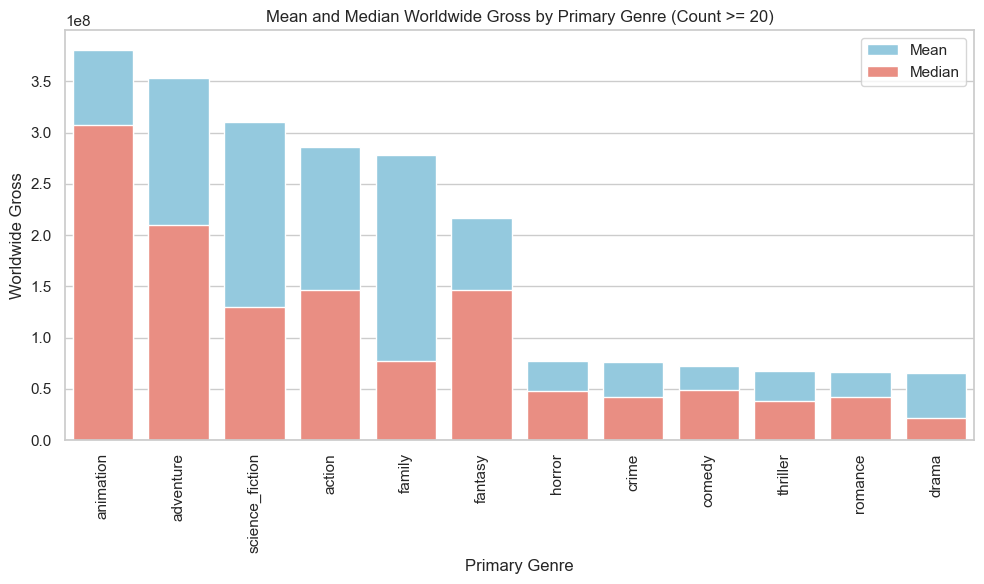

In [104]:
# Get value counts of 'primary_genre'
genre_counts = df_budget1['primary_genre'].value_counts()

# Filter out primary genres with count less than 20
popular_genres = genre_counts[genre_counts >= 20].index

# Filter the original DataFrame to include only popular genres
filtered_df = df_budget1[df_budget1['primary_genre'].isin(popular_genres)]

# Group by 'primary_genre' and calculate mean and median worldwide gross
genre_stats2 = filtered_df.groupby('primary_genre')['worldwide_gross'].agg(['mean', 'median']).reset_index()

# Sort the genre_stats DataFrame based on mean or median worldwide gross
sorted_genre_stats2 = genre_stats2.sort_values(by='mean', ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(x='primary_genre', y='mean', data=sorted_genre_stats2, color='skyblue', label='Mean')
sns.barplot(x='primary_genre', y='median', data=sorted_genre_stats2, color='salmon', label='Median')
plt.xlabel('Primary Genre')
plt.ylabel('Worldwide Gross')
plt.title('Mean and Median Worldwide Gross by Primary Genre (Count >= 20)')
plt.xticks(rotation=90)
plt.legend()
plt.tight_layout()
plt.show()

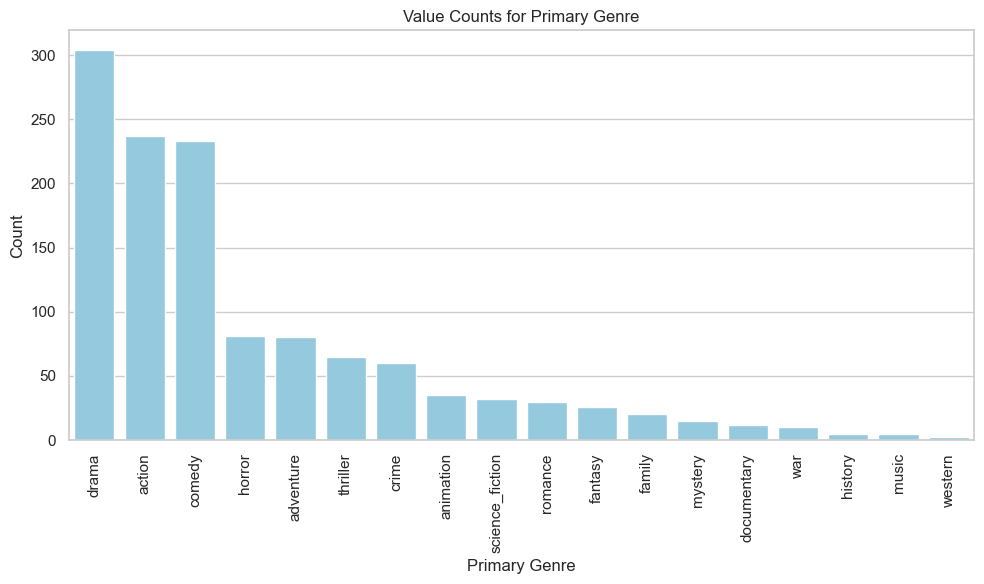

In [105]:
genre_counts = df_budget1['primary_genre'].value_counts().sort_values(ascending=False)

plt.figure(figsize=(10, 6))
sns.countplot(x='primary_genre', data=df_budget1, order=genre_counts.index, color='skyblue')
plt.xlabel('Primary Genre')
plt.ylabel('Count')
plt.title('Value Counts for Primary Genre')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

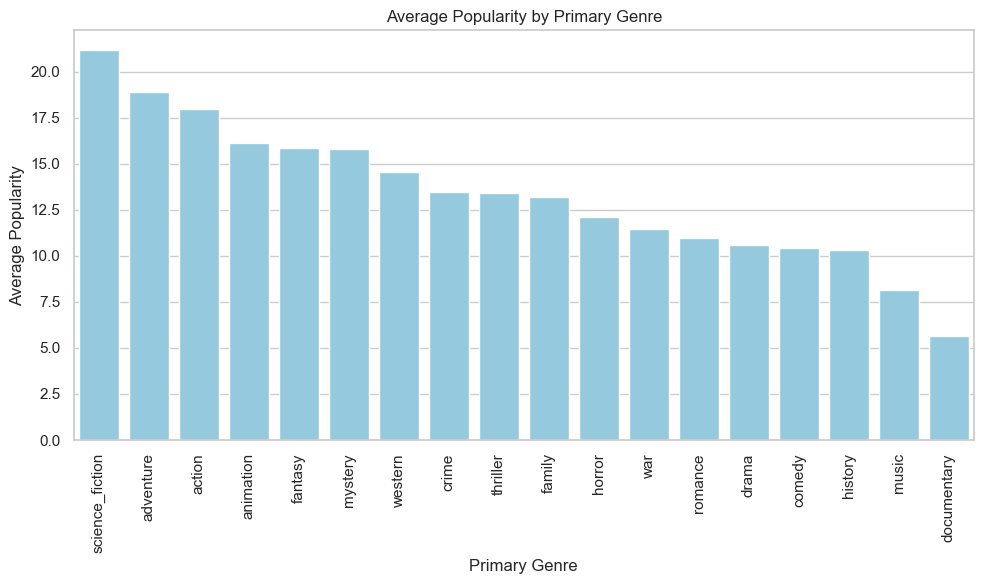

In [106]:
# Group by 'primary_genre' and calculate mean popularity
genre_popularity = df_budget1.groupby('primary_genre')['tmdb_popularity'].mean().reset_index()

# Sort the genre_popularity DataFrame based on mean popularity
sorted_genre_popularity = genre_popularity.sort_values(by='tmdb_popularity', ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(x='primary_genre', y='tmdb_popularity', data=sorted_genre_popularity, color='skyblue')
plt.xlabel('Primary Genre')
plt.ylabel('Average Popularity')
plt.title('Average Popularity by Primary Genre')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

## Merging the IMDB movie dataframe ('df_basics') with the grossing dataframe ('df_budget')

To make the best recommendations possible to our client, we'd like to use as much data as possible. Therefore, we'll also merge the IMDB movie dataframe ('df_basics') with our grossing dataframe ('df_budget').  Subsequently, we will conduct similar statistical analyses to validate what we've already observed.


In [107]:
df_basics.head()

,movie_id,title,original_title,release_year,runtime_minutes,genres,movie_id,average_rating_imdb,vote_count_imdb
0,tt0063540,sunghursh,Sunghursh,2013,175.0,"[action, crime, drama]",tt0063540,7.0,77
1,tt0066787,one day before the rainy season,Ashad Ka Ek Din,2019,114.0,"[biography, drama]",tt0066787,7.2,43
2,tt0069049,the other side of the wind,The Other Side of the Wind,2018,122.0,[drama],tt0069049,6.9,4517
4,tt0100275,the wandering soap opera,La Telenovela Errante,2017,80.0,"[comedy, drama, fantasy]",tt0100275,6.5,119
6,tt0137204,joe finds grace,Joe Finds Grace,2017,83.0,"[adventure, animation, comedy]",tt0137204,8.1,263


In [108]:
df_budget.head()

,id,release_date,title,production_budget,domestic_gross,worldwide_gross,release_year,unique_movie
0,1,2009-12-18,avatar,425000000,760507625,2776345279,2009,avatar20091218
1,2,2011-05-20,pirates of the caribbean on stranger tides,410600000,241063875,1045663875,2011,piratesofthecaribbeanonstrangertides20110520
2,3,2019-06-07,dark phoenix,350000000,42762350,149762350,2019,darkphoenix20190607
3,4,2015-05-01,avengers age of ultron,330600000,459005868,1403013963,2015,avengersageofultron20150501
4,5,2017-12-15,star wars ep viii the last jedi,317000000,620181382,1316721747,2017,starwarsepviiithelastjedi20171215


In [109]:
# Concatenate title and release_year columns to create unique_id for merging
df_basics['unique_id'] = df_basics['title'] + df_tmdb['release_year'].astype(str)

# Drop rows with NaN values in the unique_id column
df_basics.dropna(subset=['unique_id'], inplace=True)

# Apply lambda function to make unique_id lowercase and remove special characters
df_basics['unique_id'] = df_basics['unique_id'].apply(lambda x: ''.join([c.lower() for c in x if c.isalnum()]))
df_basics.head()

,movie_id,title,original_title,release_year,runtime_minutes,genres,movie_id,average_rating_imdb,vote_count_imdb,unique_id
0,tt0063540,sunghursh,Sunghursh,2013,175.0,"[action, crime, drama]",tt0063540,7.0,77,sunghursh2010
1,tt0066787,one day before the rainy season,Ashad Ka Ek Din,2019,114.0,"[biography, drama]",tt0066787,7.2,43,onedaybeforetherainyseason2010
2,tt0069049,the other side of the wind,The Other Side of the Wind,2018,122.0,[drama],tt0069049,6.9,4517,theothersideofthewind2010
4,tt0100275,the wandering soap opera,La Telenovela Errante,2017,80.0,"[comedy, drama, fantasy]",tt0100275,6.5,119,thewanderingsoapopera2010
6,tt0137204,joe finds grace,Joe Finds Grace,2017,83.0,"[adventure, animation, comedy]",tt0137204,8.1,263,joefindsgrace2009


In [110]:
# Concatenate title and release_year columns to create unique_id for merging
df_budget['unique_id'] = df_budget['title'] + df_budget['release_year'].astype(str)

# Drop rows with NaN values in the unique_id column
df_budget.dropna(subset=['unique_id'], inplace=True)

# Apply lambda function to make unique_id lowercase and remove special characters
df_budget['unique_id'] = df_budget['unique_id'].apply(lambda x: ''.join([c.lower() for c in x if c.isalnum()]))
df_budget.head()

,id,release_date,title,production_budget,domestic_gross,worldwide_gross,release_year,unique_movie,unique_id
0,1,2009-12-18,avatar,425000000,760507625,2776345279,2009,avatar20091218,avatar2009
1,2,2011-05-20,pirates of the caribbean on stranger tides,410600000,241063875,1045663875,2011,piratesofthecaribbeanonstrangertides20110520,piratesofthecaribbeanonstrangertides2011
2,3,2019-06-07,dark phoenix,350000000,42762350,149762350,2019,darkphoenix20190607,darkphoenix2019
3,4,2015-05-01,avengers age of ultron,330600000,459005868,1403013963,2015,avengersageofultron20150501,avengersageofultron2015
4,5,2017-12-15,star wars ep viii the last jedi,317000000,620181382,1316721747,2017,starwarsepviiithelastjedi20171215,starwarsepviiithelastjedi2017


In [111]:
df_imdbgross = pd.merge(df_budget, df_basics, on= 'unique_id')

In [112]:
df_imdbgross.shape

(251, 18)

In [113]:
# Dropping any duplicate rows created by merging
df_imdbgross.drop_duplicates(subset=['unique_id'], ignore_index=True, inplace=True)

In [114]:
# Dropping some irrelevant columns
columns_to_drop = ['release_year_y', 'movie_id', 'title_y', 'original_title', 'id']
df_imdbgross.drop(columns=columns_to_drop, inplace=True)

In [115]:
# Creating a 'primary_genre' column for analysis
df_imdbgross['primary_genre'] = df_imdbgross['genres'].apply(lambda x: x[0] if x else None)

In [116]:
df_imdbgross['primary_genre'].head()

0    adventure
1       action
2    adventure
3    adventure
4       action
Name: primary_genre, dtype: object

### Conducting Pearson Correlation Tests

Below, we''ll compare certain variables like average IMDB rating and IMDB vote count with worldwide grossing data to check for linear correlations.

The first test will be between 'worldwide_gross' and 'average_rating_imdb.'

**Null Hypothesis: There is no correlation between 'worldwide_gross' and 'average_rating_imdb.'**

**Alternative Hypothesis: There is a correlation between 'worldwide_gross' and 'average_rating_imdb.'**

In [117]:
correlation_coefficient, p_value = stats.pearsonr(df_imdbgross['worldwide_gross'], df_imdbgross['average_rating_imdb'].astype(int))

# Print the results
print(f"Pearson Correlation Coefficient: {correlation_coefficient}")
print(f"P-value: {p_value}")

Pearson Correlation Coefficient: 0.1404938999566184
P-value: 0.026636232080182107


The correlation between 'worldwide_gross' and 'average_rating_imdb' is quite weak, with a correlation coefficient of approximately 0.14. Nevertheless, we technically reject the null hypothesis as the p-value is approximately 0.027, which is slightly smaller than the assumed alpha level. However, due to the slight nature of the correlation, we won't plot this information as it lacks the strength to be relevant to our client. 

One potential explanation for the variance in correlation between this dataset and the TMDB correlation regarding rating and gross is the relatively smaller size of this dataframe, comprising only 249 rows. With a diminished dataset, it's probable that the accuracy of correlations could be compromised.

Nevertheless, lets see if there is a correlation between vote count and worldwide gross.

**Null hypothese: There is no correlation between 'vote_count_imdb' and 'worldwide_gross'.**

**Alternative hypothesis: There is a correlation between 'vote_count_imdb' and 'worldwide_gross'.**

In [118]:
correlation_coefficient, p_value = stats.pearsonr((df_imdbgross['vote_count_imdb']).astype(int), df_imdbgross['worldwide_gross'])

# Print the results
print("Pearson Correlation Coefficient:", correlation_coefficient)
print("P-value:", p_value)

Pearson Correlation Coefficient: 0.5781780726091215
P-value: 1.3043680986215091e-23


There is a moderately strong, positive correlation between the vote count and worldwide gross, with a correlation coefficient of approximately 0.57. The p-value is extremely small compared to our assumed alpha. Therefore, we reject the null hypothesis.

Next, we will proceed to visualize this correlation by plotting the best-fit line.

In [ ]:
# Set the style
sns.set(style="whitegrid")

# Data
x = df_imdbgross['vote_count_imdb'].astype(int)
y = df_imdbgross['worldwide_gross']

# Plot the scatter plot
sns.scatterplot(x=x, y=y, alpha=0.5)

# Add a line of best fit
m, b = np.polyfit(x, y, 1)
plt.plot(x, m*x + b, color='red')

# Label the axes and title the plot
plt.xlabel('IMDb Vote Count')
plt.ylabel('Worldwide Gross')
plt.title('Correlation Between IMDb Vote Count and Worldwide Gross')

plt.xticks(rotation=45)

# Show the plot
plt.show()

In [ ]:
df_imdbgross['vote_count_imdb'].value_counts().head()

***Genre analysis using this merged dataset is unlikely to yield valuable insights due to its small size. We've likely exhausted our analytical efforts to extract meaningful insights from this dataset. Given its limited size, the reliability of the conclusions drawn from it may be compromised. Therefore, we will omit this data for our client's recommendations.***

## IMDB Director, Writer, and Actor/Actress analysis

Lastly, this final analysis will examine the ratings attributed to films based on different writers, directors, and featuring various actors/actresses sourced from the IMDB SQL database. We hope that this information will offer valuable recommendations for potential collaborations for Limelight Studios.

The first steps we'll take are importing the relevant columns from different tables within the IMDb database, performing a minor cleaning process, assigning a 'primary_genre' for each row, and then analyzing our findings. We'll start by doing this for 'directors', followed by 'writers', and finally 'actors and actresses'.

### IMDb Directors table and analysis

In [123]:
# Extracting all the data from the 'directors' table, plus the movies matching the movie_id and the person matching the person_id, and the average_rating and numvotes
df_directors2 = pd.read_sql("""
SELECT d.person_id, d.movie_id, p.primary_name, m.primary_title, m.start_year, m.genres, mr.averagerating, mr.numvotes
FROM directors as d
JOIN movie_basics as m
ON d.movie_id = m.movie_id
JOIN persons as p
ON d.person_id = p.person_id
JOIN movie_ratings AS mr
ON d.movie_id = mr.movie_id;
""", conn)
df_directors2.head()

,person_id,movie_id,primary_name,primary_title,start_year,genres,averagerating,numvotes
0,nm0899854,tt0285252,Tony Vitale,Life's a Beach,2012,Comedy,3.9,219
1,nm1940585,tt0462036,Bill Haley,Steve Phoenix: The Untold Story,2012,Drama,5.5,18
2,nm0151540,tt0835418,Jay Chandrasekhar,The Babymakers,2012,Comedy,5.0,8147
3,nm0151540,tt0835418,Jay Chandrasekhar,The Babymakers,2012,Comedy,5.0,8147
4,nm0089502,tt0878654,Albert Pyun,Bulletface,2010,Thriller,5.8,875


In [124]:
df_directors2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 181387 entries, 0 to 181386
Data columns (total 8 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   person_id      181387 non-null  object 
 1   movie_id       181387 non-null  object 
 2   primary_name   181387 non-null  object 
 3   primary_title  181387 non-null  object 
 4   start_year     181387 non-null  int64  
 5   genres         180047 non-null  object 
 6   averagerating  181387 non-null  float64
 7   numvotes       181387 non-null  int64  
dtypes: float64(1), int64(2), object(5)
memory usage: 11.1+ MB


In [125]:
df_directors2.isna().sum()

person_id           0
movie_id            0
primary_name        0
primary_title       0
start_year          0
genres           1340
averagerating       0
numvotes            0
dtype: int64

In [134]:
df_directors2 = df_directors2.drop_duplicates(subset='movie_id')

In [135]:
df_directors2.shape

(72440, 9)

In [136]:
# Drop rows with NaN values in the 'genres' column
df_directors2 = df_directors2.dropna(subset=['genres'])
df_directors2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 72440 entries, 0 to 181386
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   person_id      72440 non-null  object 
 1   movie_id       72440 non-null  object 
 2   primary_name   72440 non-null  object 
 3   primary_title  72440 non-null  object 
 4   start_year     72440 non-null  int64  
 5   genres         72440 non-null  object 
 6   averagerating  72440 non-null  float64
 7   numvotes       72440 non-null  int64  
 8   primary_genre  72440 non-null  object 
dtypes: float64(1), int64(2), object(6)
memory usage: 5.5+ MB


In [131]:
# Convert strings to lowercase and split by comma
df_directors2['genres'] = df_directors2['genres'].str.lower().str.split(',')

# Define a function to extract the primary genre
def get_primary_genre(genre_list):
    if isinstance(genre_list, list):
        return genre_list[0] if genre_list else None
    else:
        return None

# Apply the function to create the 'primary_genre' column
df_directors2['primary_genre'] = df_directors2['genres'].apply(get_primary_genre)

In [132]:
df_directors2['primary_genre'].value_counts()

primary_genre
drama          20707
documentary    17085
comedy         16907
action          7926
horror          5888
biography       4076
adventure       3175
crime           2778
thriller        1673
animation       1295
romance          821
family           655
fantasy          526
mystery          481
sci-fi           443
music            207
musical          172
history          144
sport            133
western           78
war               54
reality-tv         3
adult              2
news               2
game-show          1
Name: count, dtype: int64

We want to ensure that our recommendations for directors not only include those associated with highly-rated films but also films that have received at least 100 votes. This precaution is taken to avoid skewing our results, ensuring that directors have been involved in both highly rated and popular films. The vote count serves as our best indicator for popularity.

We'll begin by filtering based on both vote count and rating, and then proceed to identify the 'best' directors within each of the genres we're recommending to Limelight Studios. 

These genres include:
- animation
- action
- sci-fi
- adventure
- family
- fantasy

The step-by-step process is outlined below.

In [137]:
pop_and_high_rated = df_directors2[(df_directors2['averagerating'] >= 9) & (df_directors2['numvotes'] >= 100)]
pop_and_high_rated

,person_id,movie_id,primary_name,primary_title,start_year,genres,averagerating,numvotes,primary_genre
5396,nm1823803,tt5593384,Tanel Toom,Truth and Justice,2019,[drama],9.3,1220,drama
5427,nm2918593,tt5624252,Michael Beattie,That Vitamin Movie,2016,[documentary],9.4,927,documentary
5777,nm5927288,tt8063272,Mattia Colombo,Uninvited: Marcelo Burlon,2017,[documentary],9.5,349,documentary
10245,nm1335378,tt8016662,V.K. Prakash,Praana,2019,"[crime, drama, horror]",9.0,879,crime
11071,nm0000965,tt1795369,Danny Boyle,Frankenstein,2011,[drama],9.0,1832,drama
...,...,...,...,...,...,...,...,...,...
172418,nm9364183,tt7487736,Bob Dejongh,Take Us Home,2017,[documentary],9.0,172,documentary
172510,nm8662914,tt8024712,Bayu Skak,Yowis Ben,2018,"[comedy, drama]",9.0,2992,comedy
172601,nm9073819,tt8866064,Amr Gamal,10 Days Before the Wedding,2018,"[comedy, drama, musical]",9.5,354,comedy
177724,nm8120704,tt5691226,Dipendra K. Khanal,Pashupati Prasad,2016,"[drama, romance]",9.0,1089,drama


In [ ]:
pop_and_high_rated = df_directors2[(df_directors2['averagerating'] >= 9.4) & (df_directors2['numvotes'] >= 100)]
filtered_pop_directors = pop_and_high_rated[pop_and_high_rated['primary_genre'].isin(['action', 'adventure'])]
filtered_pop_directors

In [ ]:
pop_and_high_rated1 = df_directors2[(df_directors2['averagerating'] >= 8.7) & (df_directors2['numvotes'] >= 100)]
filtered_pop_directors1 = pop_and_high_rated1[pop_and_high_rated1['primary_genre'].isin(['family'])]
filtered_pop_directors1

In [ ]:
pop_and_high_rated2 = df_directors2[(df_directors2['averagerating'] >= 8.6) & (df_directors2['numvotes'] >= 100)]
filtered_pop_directors2 = pop_and_high_rated2[pop_and_high_rated2['primary_genre'].isin(['animation'])]
filtered_pop_directors2

In [ ]:
pop_and_high_rated3 = df_directors2[(df_directors2['averagerating'] >= 7.8) & (df_directors2['numvotes'] >= 100)]
genres_to_include = ['sci-fi', 'fantasy']
filtered_pop_directors3 = pop_and_high_rated3[pop_and_high_rated3['primary_genre'].isin(genres_to_include)]
filtered_pop_directors3

***After filtering and analysis, here are our conclusions: The best adventure directors are Karzan Kardozi and Zolbayar Dorj. For action, we recommend Himesh Bhargo and Shankar. In animation, we suggest Sumnash Sri Kaljai, Brent Triplett, and Hiroshi Nagahama. For fantasy, our top picks are Matt Lang and István Zorkóczy. Lastly, for sci-fi, we recommend Erkut Altindag and M. Fahad Khan.***

### IMDb Writers table and analysis

In [ ]:
# Extracting all the data from the 'writers' table, plus the movies matching the movie_id and the person matching the person_id, and the average_rating and numvotesdf_writers2 = pd.read_sql("""
df_writers2 = pd.read_sql("""
SELECT w.person_id, w.movie_id, p.primary_name, m.primary_title, m.start_year, m.genres, mr.averagerating, mr.numvotes
FROM writers as w
JOIN movie_basics as m
ON w.movie_id = m.movie_id
JOIN persons as p
ON w.person_id = p.person_id
JOIN movie_ratings AS mr
ON w.movie_id = mr.movie_id;
""", conn)
df_writers2.head()

In [ ]:
df_writers2.info()

In [ ]:
# Dropping duplicate rows
df_writers2 = df_writers2.drop_duplicates()

In [ ]:
df_writers2.shape

In [ ]:
# Looking for NaNs in necessary columns
df_writers2.isna().sum()

In [ ]:
# Dropping all rows with NaNs in the 'genres' column
df_writers2 = df_writers2.dropna(subset=['genres'])

In [ ]:
# Convert strings to lowercase and split by comma
df_writers2['genres'] = df_writers2['genres'].str.lower().str.split(',')

# Define a function to extract the primary genre
def get_primary_genre(genre_list):
    if isinstance(genre_list, list):
        return genre_list[0] if genre_list else None
    else:
        return None

# Apply the function to create the 'primary_genre' column
df_writers2['primary_genre'] = df_writers2['genres'].apply(get_primary_genre)

In [ ]:
# Checking out work
df_writers2.head()

In [ ]:
# Filtering to find the highest rated writers in 'adventure' and 'action'
popandhighrated = df_writers2[(df_writers2['averagerating'] >= 9.4) & (df_writers2['numvotes'] >= 100)]
filtered_pop_writers = popandhighrated[popandhighrated['primary_genre'].isin(['adventure', 'action'])]
filtered_pop_writers

In [ ]:
# Filtering to find the highest rated writers in 'family'
popandhighrated1 = df_writers2[(df_writers2['averagerating'] >= 8.6) & (df_writers2['numvotes'] >= 100)]
filtered_pop_writers1 = popandhighrated1[popandhighrated1['primary_genre'].isin(['family'])]
filtered_pop_writers1

In [ ]:
# Filtering to find the highest rated writers in 'animation'
popandhighrated1 = df_writers2[(df_writers2['averagerating'] >= 8.6) & (df_writers2['numvotes'] >= 100)]
filtered_pop_writers1 = popandhighrated1[popandhighrated1['primary_genre'].isin(['animation'])]
filtered_pop_writers1

In [ ]:
# Filtering to find the highest rated writers in 'sci-fi' and 'fantasy'
popandhighrated1 = df_writers2[(df_writers2['averagerating'] >= 7.5) & (df_writers2['numvotes'] >= 100)]
genres_to_include = ['sci-fi', 'fantasy']
filtered_pop_writers1 = popandhighrated1[popandhighrated1['primary_genre'].isin(genres_to_include)]
filtered_pop_writers1

Here are the results of our writer analysis: 
- The best ***action*** writers are Navdeep Maju and Cyrus Roberge, known for writing 'Jurisdiction.'
- For ***adventure***, we recommend Zolbayar Dorj, Uyantsogt Ganbold, and Scott Powers Houston, recognized for their work on 'The Children of Genghis,' along with Karzan Kardozi, the writer of 'I Want to Live.'
- In the ***family*** genre, the standout writers are the team behind 'Sand Angels,' including Elizabeth Blake-Thomas, Isabella Blake-Thomas, Jonathan Brayley, and Bob Nevens Jr.
- For ***animation***, we recommend Usha Kaljai for her work on 'Leera the Soulmate.'
- In ***sci-fi***, Erkut Altindag stands out for his writing on 'Gizem Birimi.'
- Lastly, in ***fantasy***, we recommend Matt Lang, Nick Lang, Brian Holden, and Joe Walker, the talented writers behind 'Starship.'

### IMDb 'known_for' table and analysis

The final part of our analysis focused on actors and actresses listed in the 'known_for' table of the IMDb database. However, upon thorough examination, we found this information to be less useful than anticipated. Instead of identifying actors and actresses recognized for their talent, we ended up with a list of individuals starring in the highest-rated films per genre we're focused on. 

Given the limitations and inaccuracies in our findings, we have decided not to include this information in our official recommendations to Limelight Studios. While we've retained the step-by-step analysis below for reference, we believe our conclusions based on directors and writers provide more valuable insights.

In [ ]:
# Extracting all the data from the 'known_for' table, plus the movies matching the movie_id and the person matching the person_id, and the average_rating and numvotesdf_writers2 = pd.read_sql("""
df_creators = pd.read_sql("""
SELECT k.person_id, k.movie_id, p.primary_name, p.primary_profession, m.primary_title, m.start_year, m.genres, mr.averagerating, mr.numvotes, pr.category
FROM known_for as k
JOIN movie_basics as m
ON k.movie_id = m.movie_id
JOIN persons as p
ON k.person_id = p.person_id
JOIN movie_ratings AS mr
ON k.movie_id = mr.movie_id
JOIN principals AS pr
ON k.person_id = pr.person_id;
""", conn)
df_creators.head()

In [ ]:
# Dropping duplicate rows
df_creators = df_creators.drop_duplicates()

In [ ]:
df_creators.isna().sum()

In [ ]:
# Dropping rows with NaNs in the 'genre' column
df_creators = df_creators.dropna(subset=['genres'])

In [ ]:
df_creators.isna().sum()

In [ ]:
df_creators['category'].value_counts()

In [ ]:
# Convert strings to lowercase and split by comma
df_creators['genres'] = df_creators['genres'].str.lower().str.split(',')

# Define a function to extract the primary genre
def get_primary_genre(genre_list):
    if isinstance(genre_list, list):
        return genre_list[0] if genre_list else None
    else:
        return None

# Apply the function to create the 'primary_genre' column
df_creators['primary_genre'] = df_creators['genres'].apply(get_primary_genre)

In [ ]:
df_creators['primary_genre'].head(15)

In [ ]:
# Filtering Data to find highest rated actors and actresses in 'action' and 'adventure'
high_rated_acting = df_creators[(df_creators['averagerating'] >= 9.4) & (df_creators['numvotes'] >= 100) & ((df_creators['category'] == 'actor') | (df_creators['category'] == 'actress'))]
filtered_pop_actors = high_rated_acting[high_rated_acting['primary_genre'].isin(['action', 'adventure'])]
filtered_pop_actors

In [ ]:
# Filtering Data to find highest rated actors and actresses in 'animation' and 'family'
high_rated_acting1 = df_creators[(df_creators['averagerating'] >= 8.7) & (df_creators['numvotes'] >= 100) & ((df_creators['category'] == 'actor') | (df_creators['category'] == 'actress'))]
filtered_pop_actors1 = high_rated_acting1[high_rated_acting1['primary_genre'].isin(['animation', 'family'])]
filtered_pop_actors1

In [ ]:
# Filtering Data to find highest rated actors and actresses in 'animation' and 'family'
high_rated_acting2 = df_creators[(df_creators['averagerating'] >= 7.6) & (df_creators['numvotes'] >= 100) & ((df_creators['category'] == 'actor') | (df_creators['category'] == 'actress'))]
filtered_pop_actors2 = high_rated_acting2[high_rated_acting2['primary_genre'].isin(['sci-fi'])]
filtered_pop_actors2

In [ ]:
# Filtering Data to find highest rated actors and actresses in 'fantasy'
high_rated_acting3 = df_creators[(df_creators['averagerating'] >= 7.5) & (df_creators['numvotes'] >= 100) & ((df_creators['category'] == 'actor') | (df_creators['category'] == 'actress'))]
genres_to_include = ['fantasy']
filtered_pop_actors3 = high_rated_acting3[high_rated_acting3['primary_genre'].isin(genres_to_include)]
filtered_pop_actors3